<img src="https://user.oc-static.com/upload/2023/03/21/16794159547105_Data%20Scientist-P2-01-banner.png" alt="Alternative text" />

**Table des matières**<a id='toc0_'></a>    
- [ 1 - Analyse des données de 2020](#toc1_)    
  - [1.1 Population totale et PIB](#toc1_1_)    
    - [a) Population](#toc1_1_1_)    
    - [b) PIB](#toc1_1_2_)    
  - [1.2 Usage d'Internet](#toc1_2_)    
    - [a) Dataviz : répartition spatiale de l'usage d'Internet](#toc1_2_1_)    
    - [b) Dataviz : évolution de l'usage d'Internet](#toc1_2_2_)    
    - [c) Dataviz : évolution de l'usage d'Internet en fonction de la zone géographique](#toc1_2_3_)    
  - [1.3 Population concernée par les études secondaires et supérieures](#toc1_3_)    
    - [a) Dataviz : distribution mondiale de la population des 15-24 ans](#toc1_3_1_)    
    - [b) Dataviz : top pays ayant les plus grand taux de population des 15-24 ans](#toc1_3_2_)    
  - [1.4 Population des lycéens](#toc1_4_)    
    - [a) Dataviz : nombre de lycéens](#toc1_4_1_)    
    - [b) Dataviz : relation entre technologies numériques et nombre de lycéens](#toc1_4_2_)    
  - [1.5 Population des étudiants](#toc1_5_)    
    - [a) Dataviz : étudiants](#toc1_5_1_)    
    - [b) Dataviz : lycéens + étudiants](#toc1_5_2_)    
    - [c) Dataviz : relation entre technologies numériques et nombre d'étudiants](#toc1_5_3_)    
  - [1.6 Dépenses gouvernementales pour l'éducation](#toc1_6_)    
    - [a) Dataviz : top dépenses gouvernementales pour l'éducation](#toc1_6_1_)    
    - [b) Dataviz : dépenses gouvernementales pour l'éducation par groupe de revenus](#toc1_6_2_)    
- [ 2 - Scoring et Recommendations](#toc2_)    
  - [2.1 Préparation du Dataframe pour un scoring pondéré](#toc2_1_)    
  - [2.2 Dataviz : scoring](#toc2_2_)    
- [3 - Perspectives des pays en voie de développement](#toc3_)    
  - [3.1 Évolution de la population des 15-24 ans depuis 2010](#toc3_1_)    
  - [3.2 Évolution de la population des 15-24 ans depuis 2010 par région](#toc3_2_)    
  - [3.3 Évolution de la population lycéenne et étudiante](#toc3_3_)    
  - [3.4 Scoring pour la région de l'Afrique subsaharienne](#toc3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [283]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer Pandas pour un affichage complet du contenu des colonnes
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurer Matplotlib
plt.rcParams['figure.facecolor'] = '#EBEBEB'    # Définir la couleur de fond de la figure
plt.rcParams['axes.facecolor'] = '#EBEBEB'      # Définir la couleur de fond des axes

In [284]:
# EdStats.csv
# Ce dataset contient les données que nous avons agrégées lors de la phase de préparation des données
df = pd.read_csv("../datasets/EdStats.csv", low_memory=False)

# <a id='toc1_'></a>[ 1 - Analyse des données de 2020](#toc0_)

L'année **2020** est l'année la plus récente en terme de données pour les indicateurs que nous avons choisis, elle sera donc l'année de référence pour l'analyse.

In [285]:
# Variables globales
baseline_year = 2015                    # Année de référence pour l'analyse
target_year = 2020                      # Année cible pour l'analyse
col_year_target = f"{target_year}"      # Pour le nom de la colonne année cible analysée
col_year_base = f"{baseline_year}"      # Pour le nom de la colonne année de référence analysée

# Noms de colonnes
col_population_target = f"population_total_{target_year}"

## <a id='toc1_1_'></a>[1.1 Population totale et PIB](#toc0_)

### <a id='toc1_1_1_'></a>[a) Population](#toc0_)

In [286]:
# Sélection de l'indicateur
selected_indicator_code = "SP.POP.TOTL"

# DataFrame filtré sur l'indicateur sélectionné
df_population = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")
# Conservation des colonnes utiles pour l'analyse
df_population = df_population[["country_code", "country_name", col_year_target]].sort_values(col_year_target, ascending=False)
df_population.rename(columns={col_year_target: col_population_target}, inplace=True)

france_population = df_population.query("country_code == 'FRA'")[col_population_target].iloc[0]
pop_min = france_population / 3 # Population minimum pour l'analyse

### <a id='toc1_1_2_'></a>[b) PIB](#toc0_)

In [287]:
# Sélection de l'indicateur
selected_indicator_code = "NY.GDP.PCAP.KD"

# Variables pour les noms de colonnes
col_gdp_target = f"gdp_{target_year}"

# DataFrame filtré sur l'indicateur sélectionné
df_gdp = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")

df_gdp = df_gdp.rename(columns={col_year_target : col_gdp_target})

## <a id='toc1_2_'></a>[1.2 Usage d'Internet](#toc0_)

L'indicateur utilisé pour l'analyse du taux de pénétration d'Internet dans chaque pays est :

**IT.NET.USER.P2 : Internet users (per 100 people)**

In [288]:
# Sélection de l'indicateur
selected_indicator_code = "IT.NET.USER.P2"

# Variables pour les noms de colonnes
col_internet_users_rate_base = f"internet_users_rate_{baseline_year}"
col_internet_users_rate_target = f"internet_users_rate_{target_year}"
col_internet_users_base = f"internet_users_{baseline_year}"
col_internet_users_target = f"internet_users_{target_year}"
col_internet_users_evolution = f"internet_users_evolution_rate_{baseline_year}_{target_year}"

# DataFrame filtré sur l'indicateur sélectionné
df_internet_use = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")

# Conservation des colonnes utiles pour l'analyse
df_internet_use = df_internet_use[["region", "country_code", col_year_base, col_year_target]].sort_values(col_year_target, ascending=False)

# Renommage de colonnes
df_internet_use = df_internet_use.rename(columns={col_year_base : col_internet_users_rate_base, col_year_target : col_internet_users_rate_target})

# Merge avec les données du DataFrame de la population totale
df_internet_use = df_population.merge(df_internet_use, on="country_code")

# Calul du nombre d'utilisateurs d'Internet
df_internet_use[col_internet_users_base] = df_internet_use[col_population_target] * df_internet_use[col_internet_users_rate_base] / 100
df_internet_use[col_internet_users_target] = df_internet_use[col_population_target] * df_internet_use[col_internet_users_rate_target] / 100

# Calcul de l'évolution du taux d'utilisation d'Internet entre l'année de référence et l'année cible
df_internet_use[col_internet_users_evolution] = (df_internet_use[col_internet_users_target] - df_internet_use[col_internet_users_base]) / df_internet_use[col_internet_users_base] * 100


### <a id='toc1_2_1_'></a>[a) Dataviz : répartition spatiale de l'usage d'Internet](#toc0_)

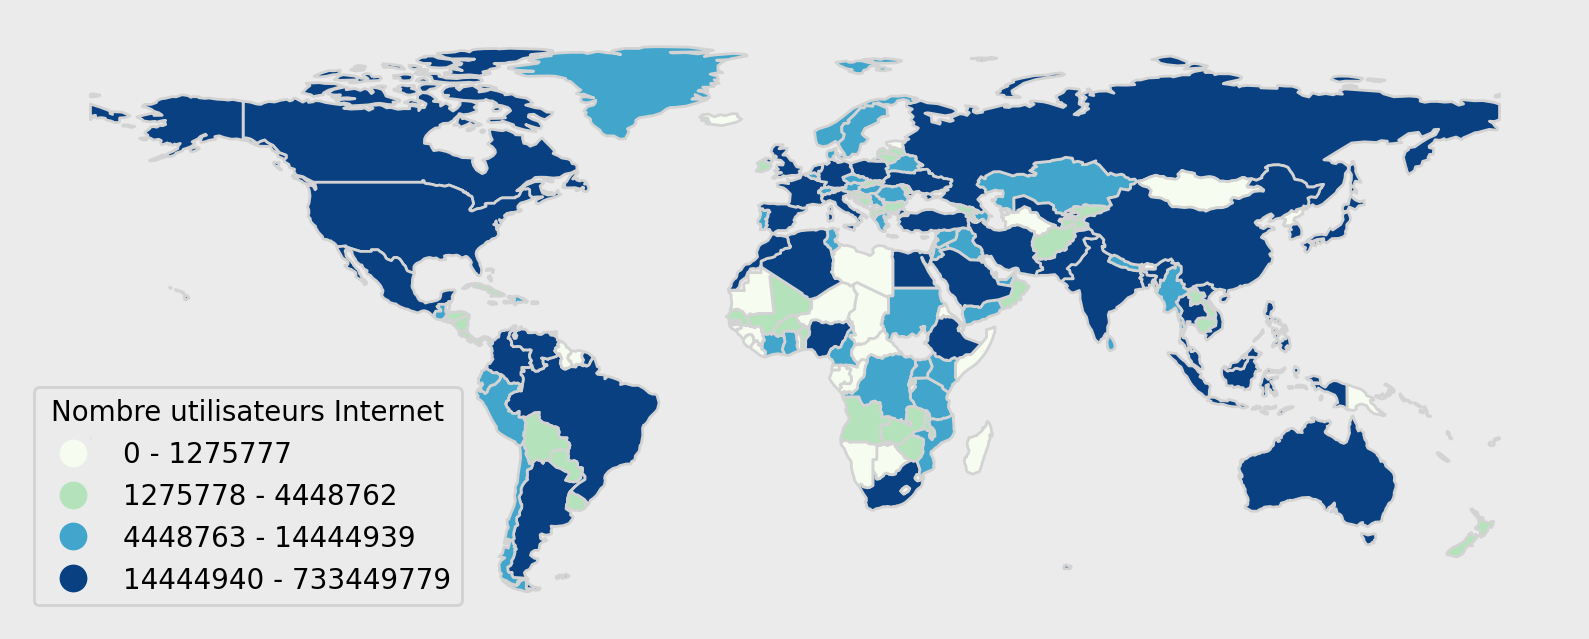

In [289]:
# Préparation des données de la map
gdf_countries = gpd.read_file("cartographie/countries.shp")
gdf_countries.loc[gdf_countries["SOV_A3"] == "FR1", "SOV_A3"] = "FRA" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "US1", "SOV_A3"] = "USA" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "IS1", "SOV_A3"] = "ISR" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "CH1", "SOV_A3"] = "CHN" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "AU1", "SOV_A3"] = "AUS" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "DN1", "SOV_A3"] = "DNK" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "GB1", "SOV_A3"] = "GBR" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "CU1", "SOV_A3"] = "CUB" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "NL1", "SOV_A3"] = "NLD" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "NZ1", "SOV_A3"] = "NZL" 
gdf_countries.loc[gdf_countries["SOV_A3"] == "KA1", "SOV_A3"] = "KAZ" 
gdf_countries = gdf_countries.merge(df_internet_use, left_on="SOV_A3", right_on="country_code", how="left")

fig, ax = plt.subplots(figsize=(10, 10), dpi=200, subplot_kw=dict(aspect="equal"))
ax.set_axis_off()

# Affichage de de la map (choroplèthe)
gdf_countries.plot(
    column=col_internet_users_target, 
    scheme="Quantiles", 
    k=4, 
    legend=True, 
    legend_kwds={"loc": "lower left", "title": "Nombre utilisateurs Internet"},
    cmap='GnBu', 
    ax=ax, 
    edgecolor='lightgray')

# Récupération des textes de la légende et ajustement pour utiliser des entiers
leg = ax.get_legend()
for text in leg.get_texts():
    label = text.get_text()
    # Split les valeurs de la légende et les convertir en entiers
    numbers = label.strip().split(',')
    converted_numbers = [int(float(number.strip())) for number in numbers]
    text.set_text(f'{converted_numbers[0]} - {converted_numbers[1] - 1}')

fig.savefig("../images/internet_users")

### <a id='toc1_2_2_'></a>[b) Dataviz : évolution de l'usage d'Internet](#toc0_)

On considère les pays ayant connu les plus fortes augmentations d'utilisateurs d'Internet et dont la population est supérieure à 1/3 de celle de la France.

Évolution observée entre 2015 et 2020

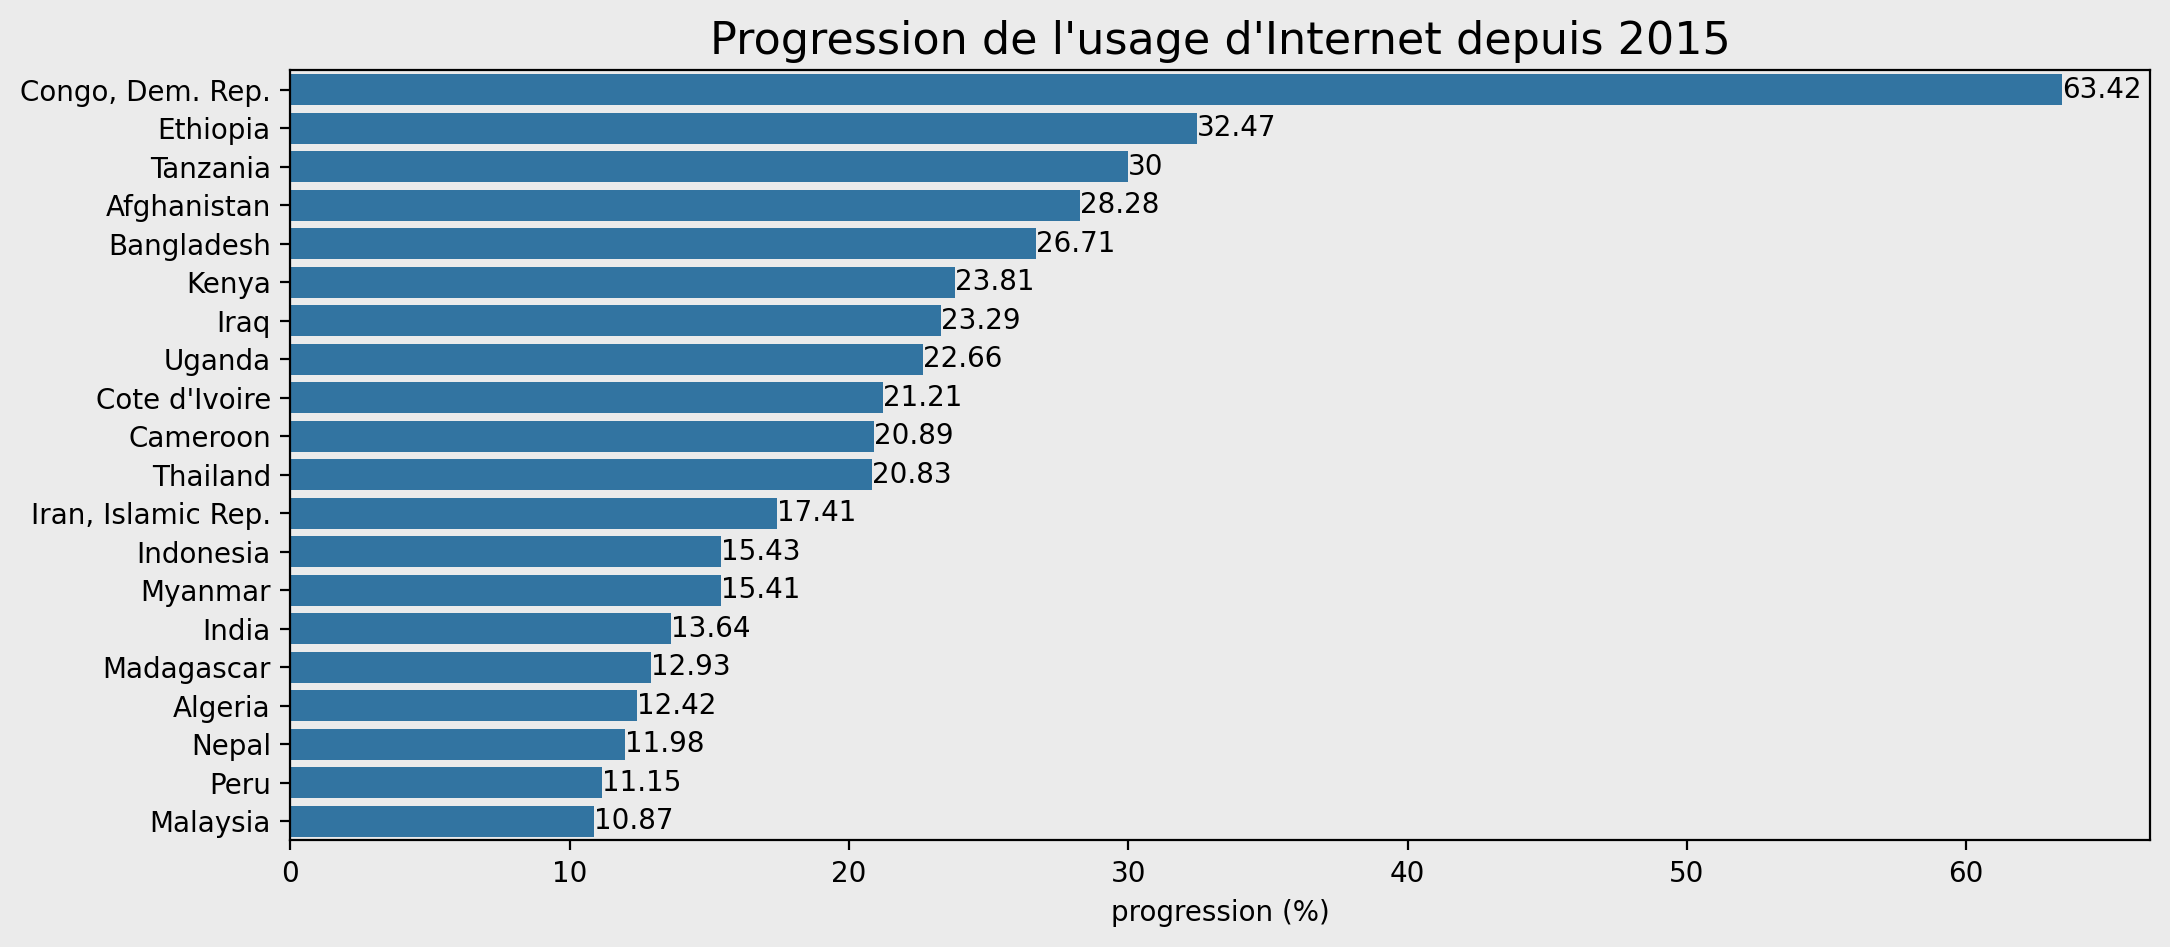

In [290]:
df_internet_use_evolution = df_internet_use.query(f"{col_population_target} > {pop_min}").sort_values(col_internet_users_evolution, ascending=False).head(20)
df_internet_use_evolution[col_internet_users_evolution] = df_internet_use_evolution[col_internet_users_evolution].round(2)

y_values = df_internet_use_evolution["country_name"]
x_values = df_internet_use_evolution[col_internet_users_evolution]

plt.figure(figsize=(12,5), dpi=200)
ax = sns.barplot(df_internet_use_evolution, x=x_values, y=y_values)
ax.set_title(f"Progression de l'usage d'Internet depuis {baseline_year}", fontsize=16)
ax.set_xlabel("progression (%)")
ax.set_ylabel("")
ax.bar_label(ax.containers[0]);

ax.figure.savefig("../images/internet_users_evolution")

### <a id='toc1_2_3_'></a>[c) Dataviz : évolution de l'usage d'Internet en fonction de la zone géographique](#toc0_)

On considère les pays ayant connu les plus fortes augmentations d'utilisateurs d'Internet et dont la population est supérieure à 1/3 de celle de la France.

Évolution observée entre 2015 et 2020

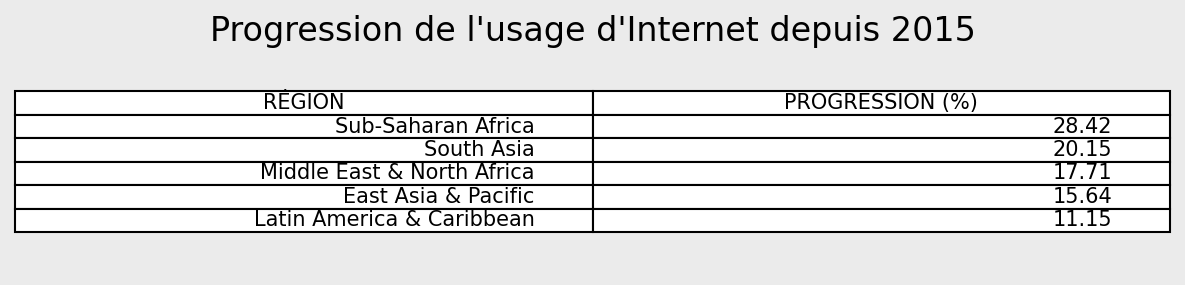

In [291]:
df_internet_use_evolution_region = df_internet_use_evolution.groupby("region")[col_internet_users_evolution].mean().reset_index()
df_internet_use_evolution_region = df_internet_use_evolution_region.sort_values(col_internet_users_evolution, ascending=False)
df_internet_use_evolution_region[col_internet_users_evolution] = df_internet_use_evolution_region[col_internet_users_evolution].round(2)
df_internet_use_evolution_region = df_internet_use_evolution_region.rename(columns={"region": "RÉGION", col_internet_users_evolution: "PROGRESSION (%)"})
fig, ax = plt.subplots(figsize=(8,2), dpi=150)
ax.set_title(f"Progression de l'usage d'Internet depuis {baseline_year}", fontsize=16)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_internet_use_evolution_region.values, colLabels=df_internet_use_evolution_region.columns, loc='center')

plt.tight_layout()
ax.figure.savefig("../images/internet_users_evolution_region")

## <a id='toc1_3_'></a>[1.3 Population concernée par les études secondaires et supérieures](#toc0_)

L'indicateur utilisé pour l'analyse de la population concernée par les études secondaires et supérieurs est :

**SP.POP.1524.TO.UN : Population, ages 15-24, totalPopulation, ages 15-24, total**

In [292]:
# Sélection de l'indicateur
selected_indicator_code = "SP.POP.1524.TO.UN"

baseline_year = 2010
col_year_base = f"{baseline_year}"

# Variables pour les noms de colonnes
col_population_15_24_base = f"population_15_24_{baseline_year}"
col_population_15_24_target = f"population_15_24_{target_year}"
col_population_15_24_evolution = f"population_15_24_evolution_rate_{baseline_year}_{target_year}"

# DataFrame filtré sur l'indicateur sélectionné
df_population_15_24 = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")
# Conservation des colonnes utiles pour l'analyse
df_population_15_24 = df_population_15_24[["region", "country_code", "country_name", col_year_base, col_year_target]].sort_values(col_year_target, ascending=False)

# Merge avec les données du DataFrame de la population totale
df_population_15_24 = df_population[["country_code", col_population_target]].merge(df_population_15_24, on="country_code")

# Renommage des colonnes
df_population_15_24 = df_population_15_24.rename(columns={col_year_base : col_population_15_24_base, col_year_target : col_population_15_24_target})

# Calcul de l'évolution du taux d'utilisation d'Internet entre l'année de référence et l'année cible
df_population_15_24[col_population_15_24_evolution] = (df_population_15_24[col_population_15_24_target] - df_population_15_24[col_population_15_24_base]) / df_population_15_24[col_population_15_24_base] * 100

france_popu_15_24 = df_population_15_24.query("country_code == 'FRA'")[col_population_15_24_target].iloc[0]
pop_15_24_min = france_popu_15_24 / 3 # Population des 15-24 ans minimum pour l'analyse

### <a id='toc1_3_1_'></a>[a) Dataviz : distribution mondiale de la population des 15-24 ans](#toc0_)

Focus sur les pays où le nombre de lycéens et d'étudiants est en dessous de 20M de personnes

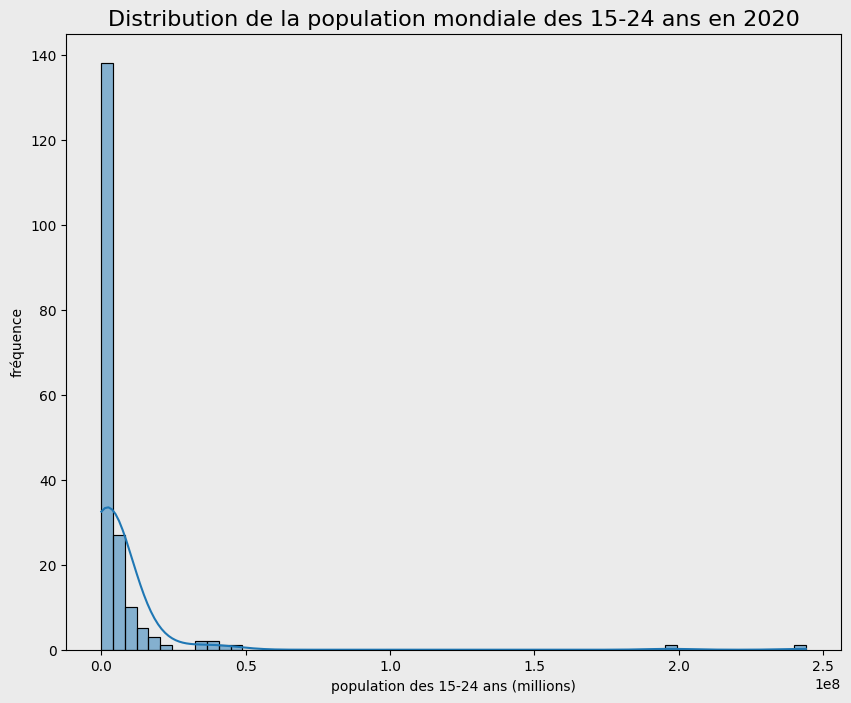

In [293]:
df_population_15_24_hist = df_population_15_24.copy()
x_values = df_population_15_24_hist[col_population_15_24_target]

plt.figure(figsize=(10, 8))
ax = sns.histplot(df_population_15_24_hist, x=x_values, kde=True, bins=60);
ax.set_title("Distribution de la population mondiale des 15-24 ans en 2020", fontsize=16)
ax.set_xlabel("population des 15-24 ans (millions)")
ax.set_ylabel("fréquence")

ax.figure.savefig("../images/pop_15_24_global_distribution")

### <a id='toc1_3_2_'></a>[b) Dataviz : top pays ayant les plus grand taux de population des 15-24 ans](#toc0_)

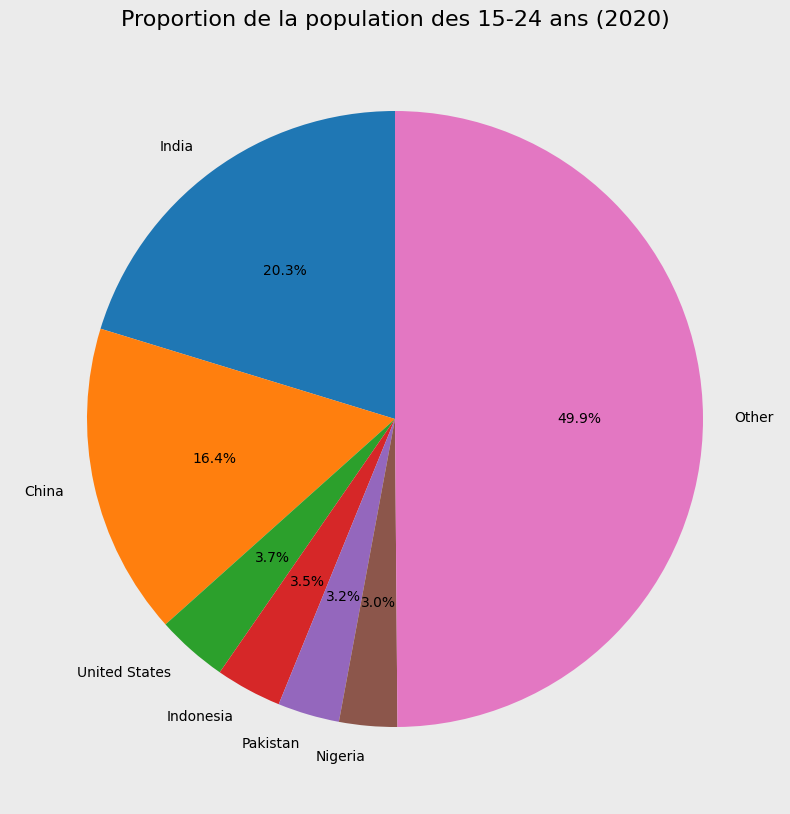

In [294]:
nb_total_15_24 = df_population_15_24[col_population_15_24_target].sum()
df_population_15_24_pie = df_population_15_24.query(f"{col_population_target} > {pop_15_24_min}").sort_values(col_population_15_24_target, ascending=False).copy().head(6)
df_population_15_24_pie["percent"] = df_population_15_24_pie[col_population_15_24_target] / nb_total_15_24 * 100
labels = np.append(df_population_15_24_pie["country_name"], "Other")
values = np.append(df_population_15_24_pie["percent"], 100 - df_population_15_24_pie["percent"].sum())
fig, ax = plt.subplots(figsize=(10,10), dpi=100);
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90);
ax.set_title(f"Proportion de la population des 15-24 ans ({target_year})", fontsize=16);
fig.savefig("../images/pop_15_24_global_proportion")

## <a id='toc1_4_'></a>[1.4 Population des lycéens](#toc0_)

L'indicateurs utilisé pour l'analyse de la population des lycéens est :

**SE.SEC.ENRL: Enrolment in secondary education, both sexes (number)**

In [295]:
# Sélection de l'indicateur
selected_indicator_code = "SE.SEC.ENRL"

# Variables pour les noms de colonnes
col_population_target = f"population_total_{target_year}"
col_secondary_students_target = f"secondary_students_{target_year}"

# DataFrame filtré sur l'indicateur sélectionné
df_secondary_students = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")
# Conservation des colonnes utiles pour l'analyse
df_secondary_students = df_secondary_students[["region", "country_code", "income_group", "country_name", col_year_target]]
# Renommage de la colonne de l'année étudiée
df_secondary_students = df_secondary_students.rename(columns={col_year_target : col_secondary_students_target})

### <a id='toc1_4_1_'></a>[a) Dataviz : nombre de lycéens](#toc0_)

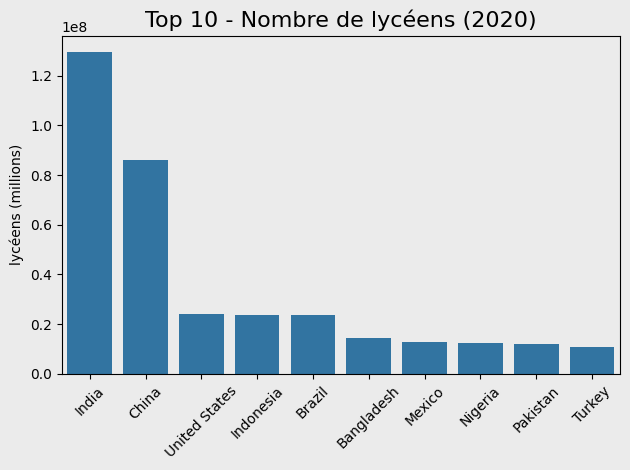

In [296]:
df_secondary_students_plot = df_secondary_students.sort_values(col_secondary_students_target, ascending=False).head(10)
x_values = df_secondary_students_plot["country_name"]
y_values = df_secondary_students_plot[col_secondary_students_target]

plt.figure(dpi=100)
ax = sns.barplot(df_secondary_students_plot, x=x_values, y=y_values)
ax.set_title("Top 10 - Nombre de lycéens (2020)", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("lycéens (millions)")
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45)

plt.tight_layout()
ax.figure.savefig("../images/secondary_students")

### <a id='toc1_4_2_'></a>[b) Dataviz : relation entre technologies numériques et nombre de lycéens](#toc0_)

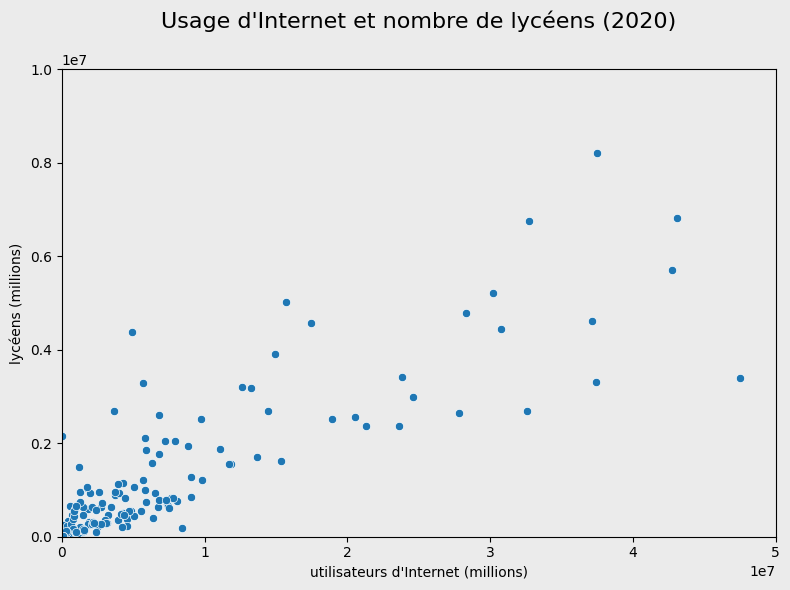

In [297]:
df_internet_secondary = df_secondary_students.merge(df_internet_use[["country_code", col_internet_users_target]], on="country_code")

plt.figure(figsize=(8,6), dpi=100)
ax = sns.scatterplot(df_internet_secondary, x=df_internet_secondary[col_internet_users_target], y=df_internet_secondary[col_secondary_students_target])
ax.set_title("Usage d'Internet et nombre de lycéens (2020)", fontsize=16, pad=30)
ax.set_xlabel("utilisateurs d'Internet (millions)")
ax.set_ylabel("lycéens (millions)")
ax.set_xlim(0, 50_000_000)
ax.set_ylim(0, 10_000_000)

plt.tight_layout()
ax.figure.savefig("../images/secondary_students_vs_internet_use")

## <a id='toc1_5_'></a>[1.5 Population des étudiants](#toc0_)

L'indicateur utilisé pour l'analyse de la population des étudiants est :

**SE.TER.ENRL : Enrolment in tertiary education, all programmes, both sexes (number)**

In [298]:
# Sélection de l'indicateur
selected_indicator_code = "SE.TER.ENRL"

# Variables pour les noms de colonnes
col_population_target = f"population_total_{target_year}"
col_tertiary_students_target = f"tertiary_students_{target_year}"

# DataFrame filtré sur l'indicateur sélectionné
df_tertiary_students = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")
# Conservation des colonnes utiles pour l'analyse
df_tertiary_students = df_tertiary_students[["region", "country_code", "country_name", col_year_target]].sort_values(col_year_target, ascending=False)
# Renommage de la colonne de l'année étudiée
df_tertiary_students = df_tertiary_students.rename(columns={col_year_target : col_tertiary_students_target})

### <a id='toc1_5_1_'></a>[a) Dataviz : étudiants](#toc0_)

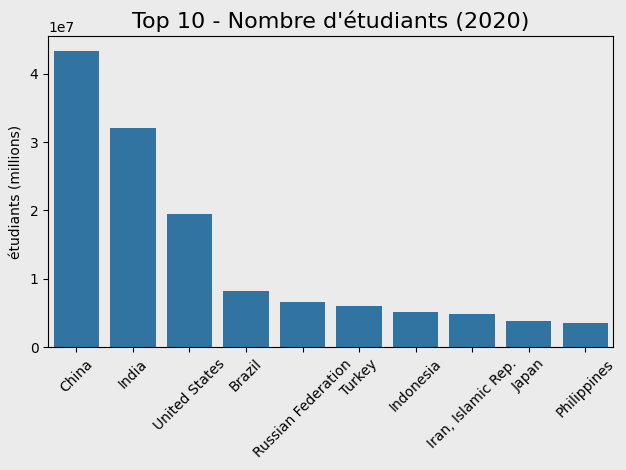

In [299]:
df_tertiary_students_plot = df_tertiary_students.sort_values(col_tertiary_students_target, ascending=False).head(10)
x_values = df_tertiary_students_plot["country_name"]
y_values = df_tertiary_students_plot[col_tertiary_students_target]

plt.figure(dpi=100)
ax = sns.barplot(df_tertiary_students_plot, x=x_values, y=y_values)
ax.set_title("Top 10 - Nombre d'étudiants (2020)", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("étudiants (millions)")
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45)

plt.tight_layout()
ax.figure.savefig("../images/tertiary_students")

### <a id='toc1_5_2_'></a>[b) Dataviz : lycéens + étudiants](#toc0_)

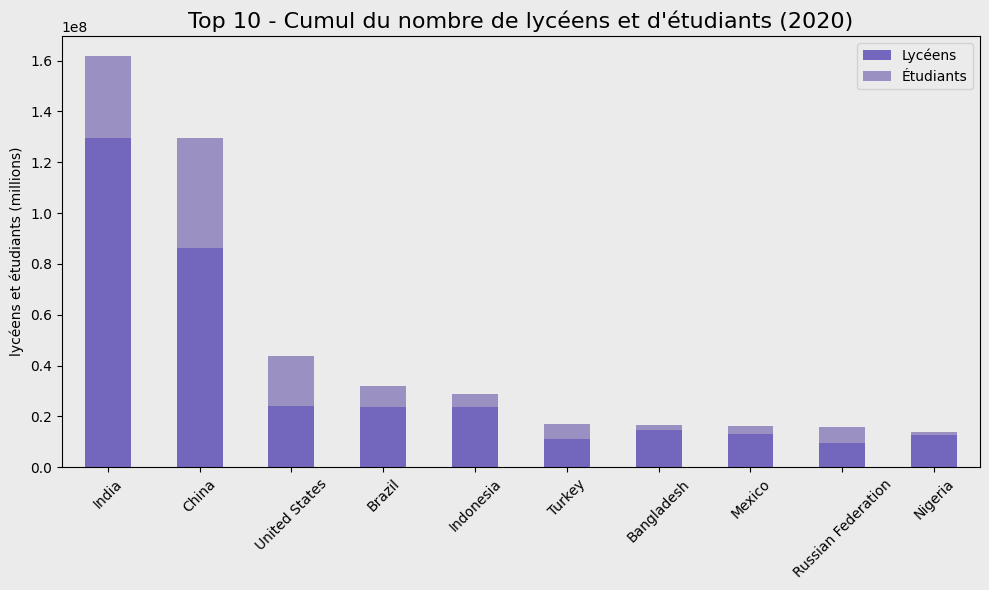

In [300]:
# Variables
col_secondary_tertiary_studiants_target = f"secondary_tertiary_studiants_{target_year}"

df_secondary_tertiary_students_plot = pd.merge(df_secondary_students, df_tertiary_students, on="country_name")
df_secondary_tertiary_students_plot[col_secondary_tertiary_studiants_target] = df_secondary_tertiary_students_plot[col_secondary_students_target] + df_secondary_tertiary_students_plot[col_tertiary_students_target]
df_secondary_tertiary_students_plot = df_secondary_tertiary_students_plot.sort_values(col_secondary_tertiary_studiants_target, ascending=False).head(10)

df_secondary_tertiary_students_plot.set_index("country_name", inplace=True)

plt.figure(figsize=(10, 6), dpi=100)
ax = df_secondary_tertiary_students_plot[[col_secondary_students_target, col_tertiary_students_target]].plot(kind='bar', stacked=True, color=["#7366BD", "#9B90C2"], ax=plt.gca())
ax.set_xlabel("")
ax.set_ylabel("lycéens et étudiants (millions)")
ax.set_title("Top 10 - Cumul du nombre de lycéens et d\'étudiants (2020)", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(["Lycéens", "Étudiants"])

plt.tight_layout()
ax.figure.savefig("../images/secondary_tertiary_students.png")

### <a id='toc1_5_3_'></a>[c) Dataviz : relation entre technologies numériques et nombre d'étudiants](#toc0_)

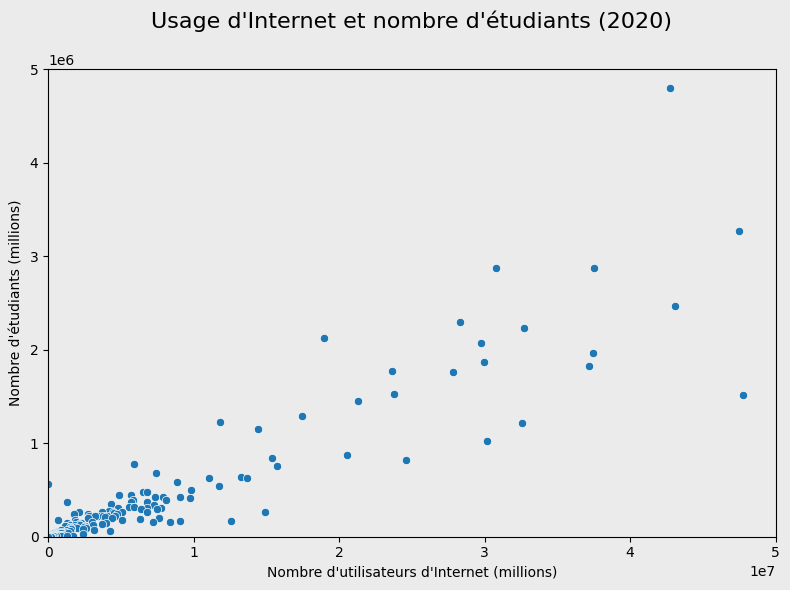

In [301]:
df_internet_tertiary = df_tertiary_students.merge(df_internet_use[["country_code", col_internet_users_target]], on="country_code")
x_values = df_internet_tertiary[col_internet_users_target]
y_values = df_internet_tertiary[col_tertiary_students_target]

plt.figure(figsize=(8,6), dpi=100)
ax = sns.scatterplot(df_internet_tertiary, x=x_values, y=y_values)
ax.set_title("Usage d'Internet et nombre d'étudiants (2020)", fontsize=16, pad=30)
ax.set_xlabel("Nombre d'utilisateurs d'Internet (millions)")
ax.set_ylabel("Nombre d'étudiants (millions)")
ax.set_xlim(0, 50_000_000)
ax.set_ylim(0, 5_000_000)

plt.tight_layout()
ax.figure.savefig("../images/tertiary_students_vs_internet_use")

## <a id='toc1_6_'></a>[1.6 Dépenses gouvernementales pour l'éducation](#toc0_)

L'indicateur utilisé pour l'analyse de la dépense gouvernementale pour l'éducation est :

**SE.XPD.TOTL.GD.ZS : Government expenditure on education as % of GDP (%)**

In [302]:
# Sélection de l'indicateur
selected_indicator_code = "SE.XPD.TOTL.GD.ZS"

# Variables pour les noms de colonnes
col_expenditure_target = f"expenditure_{target_year}"

# DataFrame filtré sur l'indicateur sélectionné
df_expenditure = df.query(f"indicator_code == '{selected_indicator_code}' and country_type == 'country'")

# Merge avec les données du DataFrame de la population totale
df_expenditure = df_population_15_24[["country_code", col_population_15_24_target]].merge(df_expenditure, on="country_code")

df_expenditure = df_expenditure.rename(columns={col_year_target : col_expenditure_target})

df_expenditure = df_expenditure[["country_code", "country_name", col_population_15_24_target, col_expenditure_target]]

### <a id='toc1_6_1_'></a>[a) Dataviz : top dépenses gouvernementales pour l'éducation](#toc0_)

On considère les pays dont la population des 15 - 24 ans est supérieure à 1/3 de celle de la France.

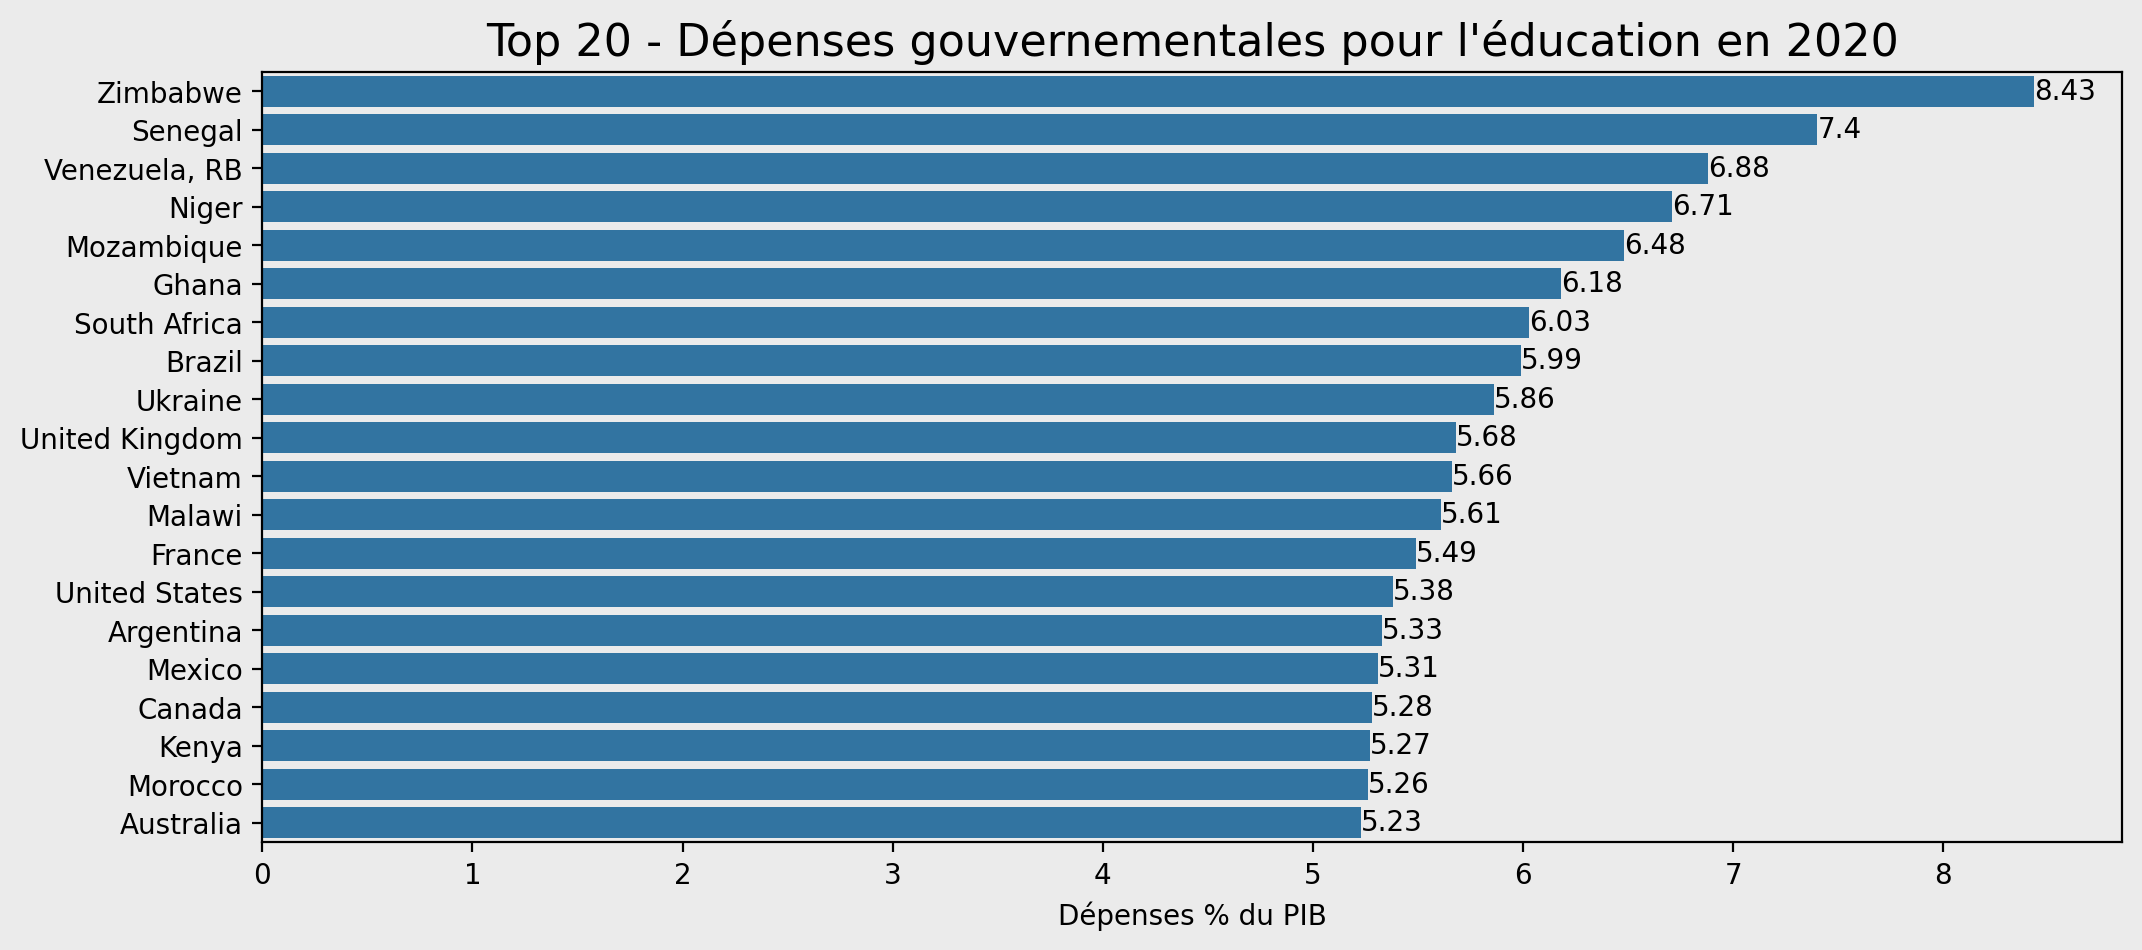

In [303]:
df_expenditure_top_20 = df_expenditure.query(f"{col_population_15_24_target} > {pop_15_24_min}").sort_values(col_expenditure_target, ascending=False).head(20).copy()
df_expenditure_top_20[col_expenditure_target] = df_expenditure_top_20[col_expenditure_target].round(2)

y_values = df_expenditure_top_20["country_name"]
x_values = df_expenditure_top_20[col_expenditure_target]

plt.figure(figsize=(12,5), dpi=200)
ax = sns.barplot(df_expenditure_top_20, x=x_values, y=y_values,)
ax.set_title(f"Top 20 - Dépenses gouvernementales pour l'éducation en {target_year}", fontsize=16)
ax.set_xlabel("Dépenses % du PIB")
ax.set_ylabel("")
ax.bar_label(ax.containers[0]);
ax.figure.savefig("../images/expenditure_top_20")

### <a id='toc1_6_2_'></a>[b) Dataviz : dépenses gouvernementales pour l'éducation par groupe de revenus](#toc0_)

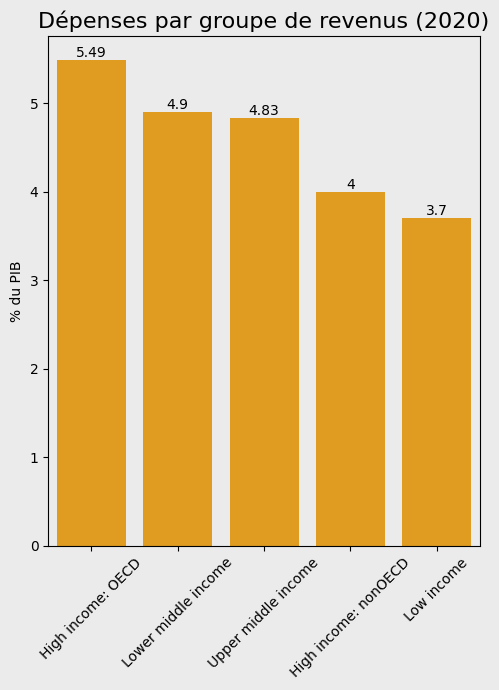

In [304]:
df_expenditure_income_group = df_expenditure.merge(df[["country_code", "income_group"]], on="country_code")
df_expenditure_income_group = df_expenditure_income_group.groupby("income_group")[col_expenditure_target].mean().reset_index()
df_expenditure_income_group = df_expenditure_income_group.sort_values(col_expenditure_target, ascending=False)

x_values = df_expenditure_income_group["income_group"]
y_values = df_expenditure_income_group[col_expenditure_target].round(2)

plt.figure(figsize=(5,7), dpi=100)
ax = sns.barplot(df_expenditure_income_group, x=x_values, y=y_values, color="Orange")
ax.set_title("Dépenses par groupe de revenus (2020)", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("% du PIB")
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45)
ax.bar_label(ax.containers[0]);

plt.tight_layout()
ax.figure.savefig("../images/expenditure_income_group")

# <a id='toc2_'></a>[ 2 - Scoring et Recommendations](#toc0_)

## <a id='toc2_1_'></a>[2.1 Préparation du Dataframe pour un scoring pondéré](#toc0_)

In [305]:
from functools import reduce

# Ensemble des Dataframes participant au scoring
dataframes = [
    df_population[["country_code", "country_name", col_population_target]],
    df_gdp[["region", "country_code", col_gdp_target]],
    df_internet_use[["country_code", col_internet_users_target]],
    df_population_15_24[["country_code", col_population_15_24_target]],
    df_secondary_students[["country_code", col_secondary_students_target]],
    df_tertiary_students[["country_code", col_tertiary_students_target]],
    df_expenditure[["country_code", col_expenditure_target]]
]

# Réduction de l'ensemble des Dataframes pour obtenir le Dataframe de scoring
df_scoring = reduce(lambda left, right: pd.merge(left, right, on='country_code'), dataframes).query(f"{col_population_15_24_target} > {pop_15_24_min}")

# Pondération pour les scores
scores_weight = {
    "gdp": 4,
    "internet": 3,
    "population_15_24": 1,
    "secondary": 2,
    "tertiary": 2,
    "expenditure": 3,
}

# Liste des colonnes cibles pour la normalisation des valeurs
targets_standardization = [
    ("gdp", col_gdp_target),
    ("internet", col_internet_users_target),
    ("population_15_24", col_population_15_24_target),
    ("secondary", col_secondary_students_target),
    ("tertiary", col_tertiary_students_target),
    ("expenditure", col_expenditure_target),
]

# Normalisation des valeurs des indicateurs en utilisant 10 quantiles
for name, col in targets_standardization:
    # Utilisation de qcut pour diviser les données en 10 quantiles
    # Les labels vont de 0 à 9, représentant chaque quantile
    df_scoring[f'quantile_{name}'], bins = pd.qcut(df_scoring[col], 10, labels=False, retbins=True, duplicates='drop')

    # Normalisation des labels de quantiles pour qu'ils soient compris entre 0 et 1
    df_scoring[f'quantile_{name}'] = df_scoring[f'quantile_{name}'] / (len(bins) - 2)

targets = [
    ("gdp", "quantile_gdp"),
    ("internet", "quantile_internet"),
    ("population_15_24", "quantile_population_15_24"),
    ("secondary", "quantile_secondary"),
    ("tertiary", "quantile_tertiary"),
    ("expenditure", "quantile_expenditure"),
]

# Calcul des scores normalisés
for name, col in targets:
    df_scoring[f'score_{name}'] = df_scoring[col] / df_scoring[col].max()

# Calcul du score global
df_scoring['score_global'] = sum(df_scoring[f'score_{name}'] * weight for name, weight in scores_weight.items()) / sum(scores_weight.values())

## <a id='toc2_2_'></a>[2.2 Dataviz : scoring](#toc0_)

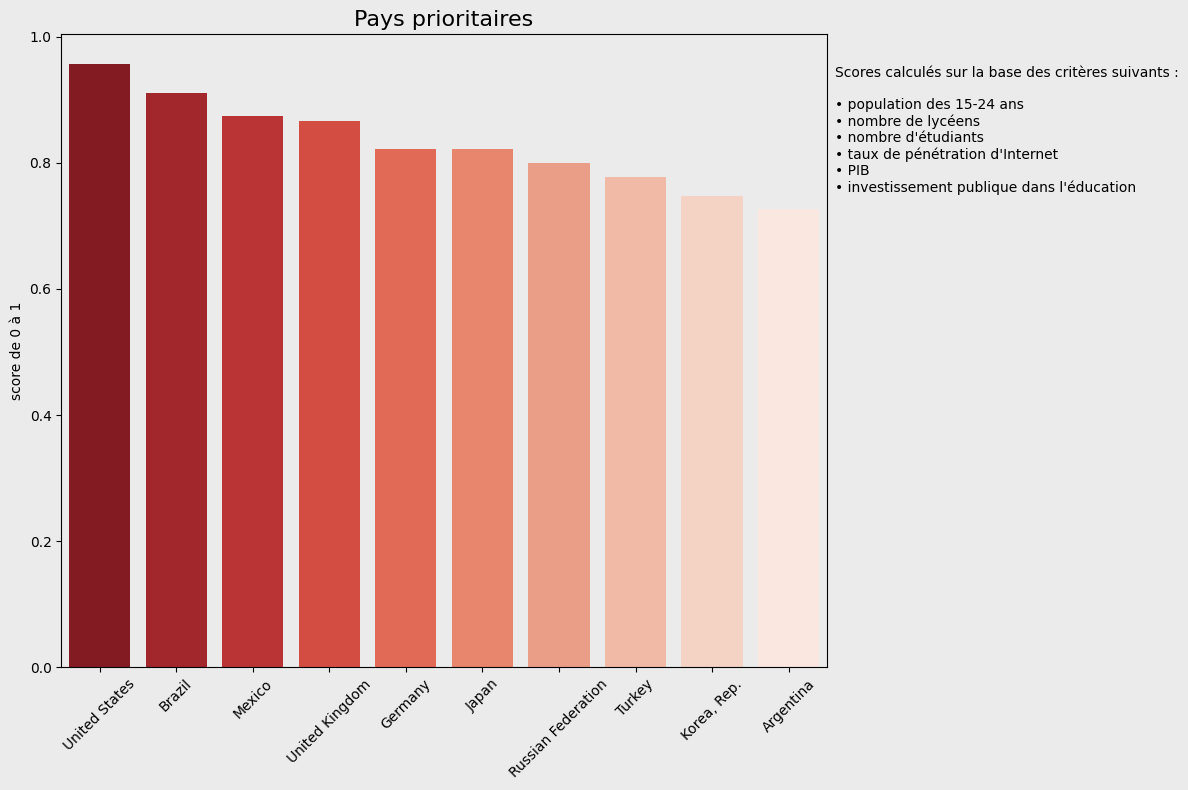

In [306]:
df_scoring_plot = df_scoring.query("country_code != 'FRA'").sort_values("score_global", ascending=False)[["country_name", "score_global"]].head(10)
x_values = df_scoring_plot["country_name"]
y_values = df_scoring_plot["score_global"].round(3)

plt.figure(figsize=(12,8), dpi=100)
ax = sns.barplot(df_scoring_plot, x=x_values, y=y_values, hue="score_global", palette=sns.color_palette("Reds_r", len(x_values))[::-1], legend=False)
ax.set_title("Pays prioritaires", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("score de 0 à 1")
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45);

# Ajout du texte
texte = """Scores calculés sur la base des critères suivants :

• population des 15-24 ans
• nombre de lycéens
• nombre d'étudiants
• taux de pénétration d'Internet
• PIB
• investissement publique dans l'éducation"""

# Positionnement du texte à droite du diagramme
plt.text(1.01, 0.95, texte, transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
ax.figure.savefig("../images/scoring_priority_countries")

# <a id='toc3_'></a>[3 - Perspectives des pays en voie de développement](#toc0_)

## <a id='toc3_1_'></a>[3.1 Évolution de la population des 15-24 ans depuis 2010](#toc0_)

On considère les pays dont la population des 15-24 ans est supérieure à 1/3 de celle de la France.

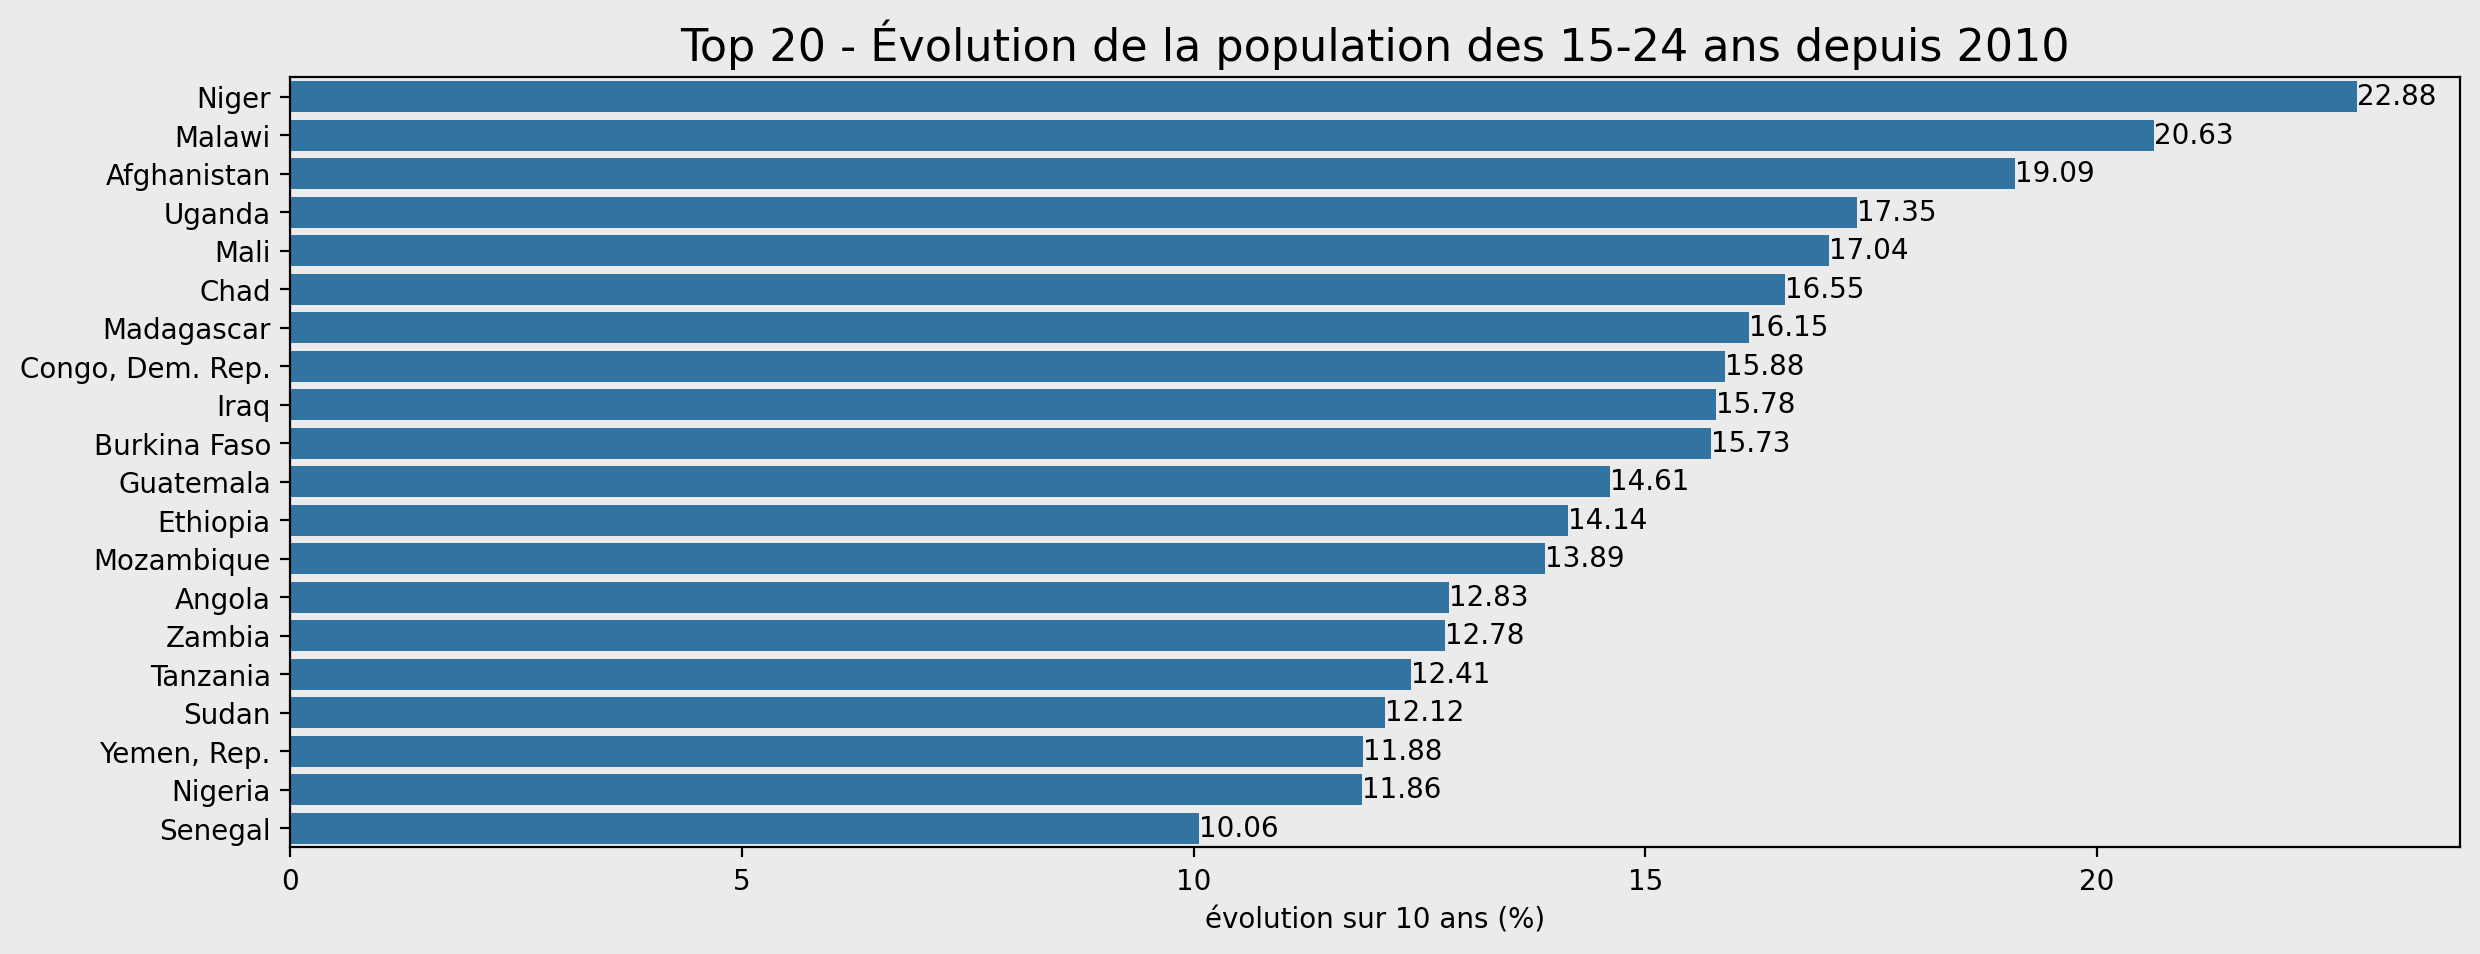

In [307]:
df_population_15_24_evolution = df_population_15_24.query(f"{col_population_15_24_target} > {pop_15_24_min}").sort_values(col_population_15_24_evolution, ascending=False).head(20)
df_population_15_24_evolution[col_population_15_24_evolution] = df_population_15_24_evolution[col_population_15_24_evolution].round(2)

y_values = df_population_15_24_evolution["country_name"]
x_values = df_population_15_24_evolution[col_population_15_24_evolution]

plt.figure(figsize=(14,5), dpi=200)
ax = sns.barplot(df_population_15_24_evolution, x=x_values, y=y_values)
ax.set_title(f"Top 20 - Évolution de la population des 15-24 ans depuis {baseline_year}", fontsize=16)
ax.set_xlabel("évolution sur 10 ans (%)")
ax.set_ylabel("")
ax.bar_label(ax.containers[0]);
ax.figure.savefig("../images/pop_15_24_global_evolution")

## <a id='toc3_2_'></a>[3.2 Évolution de la population des 15-24 ans depuis 2010 par région](#toc0_)

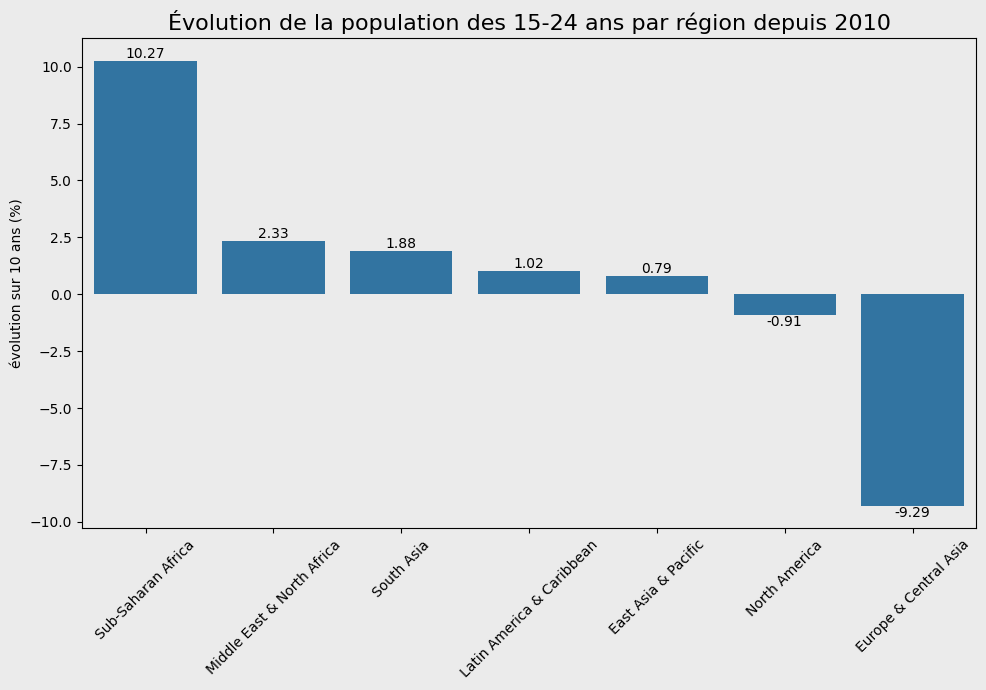

In [308]:
df_population_15_24_evolution_bar = df_population_15_24.copy().groupby("region")[col_population_15_24_evolution].mean()
df_population_15_24_evolution_bar = df_population_15_24_evolution_bar.sort_values(ascending=False).reset_index()

x_values = df_population_15_24_evolution_bar["region"]
y_values = df_population_15_24_evolution_bar[col_population_15_24_evolution].round(2)

plt.figure(figsize=(10,7), dpi=100)
ax = sns.barplot(df_population_15_24_evolution_bar, x=x_values, y=y_values)
ax.set_title(f"Évolution de la population des 15-24 ans par région depuis {baseline_year}", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("évolution sur 10 ans (%)")
ax.bar_label(ax.containers[0]);
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45)

plt.tight_layout()
ax.figure.savefig("../images/pop_15_24_global_evolution")

## <a id='toc3_3_'></a>[3.3 Évolution de la population lycéenne et étudiante](#toc0_)

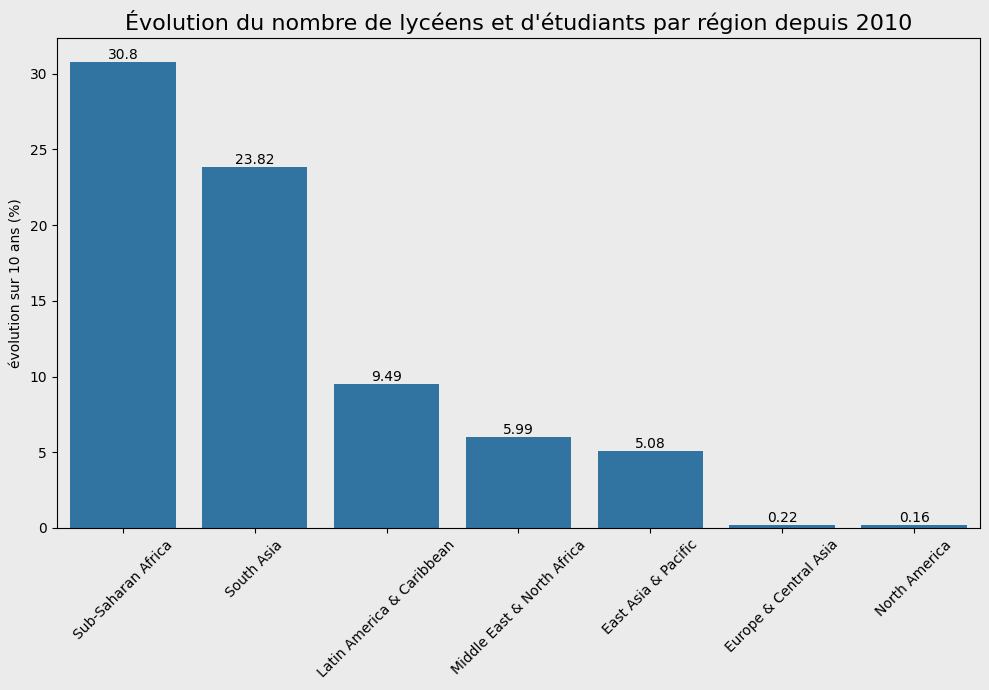

In [309]:
df_secondary_students_ = df.query(f"indicator_code == 'SE.SEC.ENRL' and country_type == 'country'")
df_secondary_students_ = df_secondary_students_.merge(df_population_15_24[["country_code", col_population_15_24_target]], on="country_code")
df_secondary_students_ = df_secondary_students_.query(f"{col_population_15_24_target} >= {pop_15_24_min}")
df_secondary_students_ = df_secondary_students_[["region", "country_code", "income_group", "country_name", "2010", "2020"]]

df_tertiary_students_ = df.query(f"indicator_code == 'SE.TER.ENRL' and country_type == 'country'")
df_tertiary_students_ = df_tertiary_students_.merge(df_population_15_24[["country_code", col_population_15_24_target]], on="country_code")
df_tertiary_students_ = df_tertiary_students_.query(f"{col_population_15_24_target} >= {pop_15_24_min}")
df_tertiary_students_ = df_tertiary_students_[["region", "country_code", "income_group", "country_name", "2010", "2020"]]

df_total_secondary_tertiary_students = df_secondary_students_.merge(df_tertiary_students_[["country_code", "2010", "2020"]], on="country_code")
df_total_secondary_tertiary_students["total_2010"] = df_total_secondary_tertiary_students["2010_x"] + df_total_secondary_tertiary_students["2010_y"]
df_total_secondary_tertiary_students["total_2020"] = df_total_secondary_tertiary_students["2020_x"] + df_total_secondary_tertiary_students["2020_y"]
df_total_secondary_tertiary_students["total_progression"] = (df_total_secondary_tertiary_students["total_2020"] - df_total_secondary_tertiary_students["total_2010"]) / df_total_secondary_tertiary_students["total_2010"] * 100

df_total_secondary_tertiary_students = df_total_secondary_tertiary_students.groupby("region")["total_progression"].mean().reset_index().sort_values("total_progression", ascending=False)

x_values = df_total_secondary_tertiary_students["region"]
y_values = df_total_secondary_tertiary_students["total_progression"].round(2)

plt.figure(figsize=(10,7), dpi=100)
ax = sns.barplot(df_total_secondary_tertiary_students, x=x_values, y=y_values)
ax.set_title(f"Évolution du nombre de lycéens et d'étudiants par région depuis 2010", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("évolution sur 10 ans (%)")
ax.bar_label(ax.containers[0]);
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45)

plt.tight_layout()
ax.figure.savefig("../images/students_secondary_tertiary_global_evolution")

## <a id='toc3_4_'></a>[3.4 Scoring pour la région de l'Afrique subsaharienne](#toc0_)

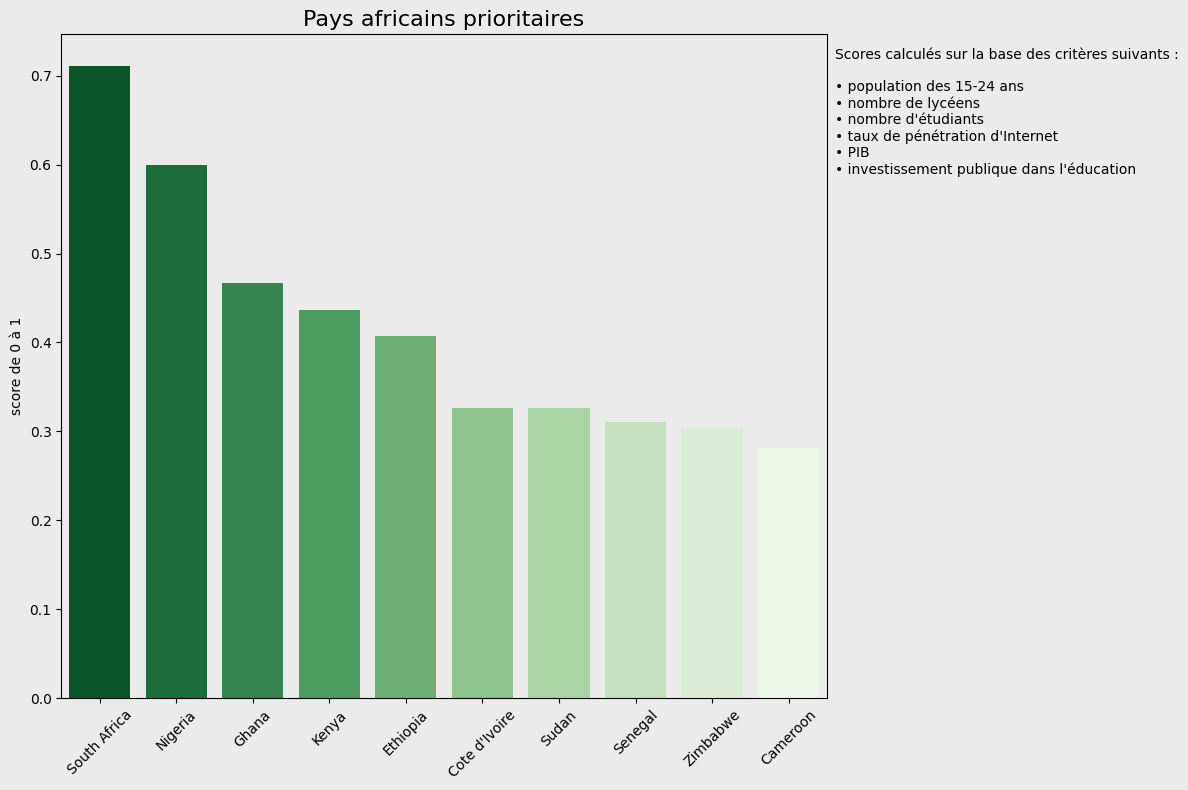

In [310]:
df_scoring_plot_africa = df_scoring.query("region == 'Sub-Saharan Africa'").sort_values("score_global", ascending=False)[["country_name", "score_global"]].head(10)
x_values = df_scoring_plot_africa["country_name"]
y_values = df_scoring_plot_africa["score_global"].round(3)

plt.figure(figsize=(12,8), dpi=100)
ax = sns.barplot(df_scoring_plot_africa, x=x_values, y=y_values, hue="score_global", palette=sns.color_palette("Greens_r", len(x_values))[::-1], legend=False)
ax.set_title("Pays africains prioritaires", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("score de 0 à 1")
ax.set_xticks(x_values)
ax.set_xticklabels(x_values, rotation=45);

# Ajout du texte
texte = """Scores calculés sur la base des critères suivants :

• population des 15-24 ans
• nombre de lycéens
• nombre d'étudiants
• taux de pénétration d'Internet
• PIB
• investissement publique dans l'éducation"""

# Positionnement du texte à droite du diagramme
plt.text(1.01, 0.98, texte, transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
ax.figure.savefig("../images/scoring_priority_countries_africa")